In [1]:
import kagglehub
import pandas as pd
import numpy as np
import os

# Download dataset
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")
print("Path to dataset files:", path)

# Check what files are inside
print(os.listdir(path))

# Load dataset 
data = pd.read_csv(os.path.join(path, "heart_disease_uci.csv"))

Path to dataset files: C:\Users\dodoe\.cache\kagglehub\datasets\redwankarimsony\heart-disease-data\versions\6
['heart_disease_uci.csv']


In [3]:
# check the details
print(data.head())
data.info()
print(data.describe())
# check how many of the data is null
print(data.isnull().sum())
# Drop high-missing columns
data = data.drop(columns=['ca', 'thal','dataset'])

# Fill numeric features with median
for col in ['trestbps', 'chol', 'thalch', 'oldpeak']:
    if col in data.columns:
        data[col] = data[col].fillna(data[col].median())

# Fill categorical features with mode
for col in ['restecg', 'exang', 'slope','fbs']:
    if col in data.columns:
        data[col] = data[col].fillna(data[col].mode()[0])
# check again after cleaning the data
print('data after cleaning')
print(data.isnull().sum())



   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  
<class '

C:\Users\dodoe\AppData\Local\Temp\ipykernel_26988\3927228054.py:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].fillna(data[col].mode()[0])


In [4]:
# check dublicates
print(data.duplicated().sum())
data = data.drop_duplicates()
#check data types
print(data.dtypes)
# check values
print(data['sex'].unique())
print(data['cp'].unique())

data.describe()

0
id            int64
age           int64
sex          object
cp           object
trestbps    float64
chol        float64
fbs            bool
restecg      object
thalch      float64
exang          bool
oldpeak     float64
slope        object
num           int64
dtype: object
['Male' 'Female']
['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']


,id,age,trestbps,chol,thalch,oldpeak,num
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,460.500000,53.510870,131.995652,199.908696,137.692391,0.853261,0.995652
std,265.725422,9.424685,18.451300,109.040171,25.145235,1.058049,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,230.750000,47.000000,120.000000,177.750000,120.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,1.000000
75%,690.250000,60.000000,140.000000,267.000000,156.000000,1.500000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [6]:
data = data.drop(columns=['id'])

for col in ['trestbps', 'chol']:
        data[col] = data[col].replace(0, np.nan)   
        data[col] = data[col].fillna(data[col].median()) 
#replacing negative with reasonable numbers
data['oldpeak'] = data['oldpeak'].mask(data['oldpeak'] < 0, np.nan).fillna(data['oldpeak'].median())
# 4. Convert num into 0 = no disease, 1 = disease
if 'num' in data.columns:
    data['num'] = data['num'].apply(lambda x: 1 if x > 0 else 0)

# 5. Final check
print(data.isnull().sum())   # should be all 0 now
print(data['num'].value_counts())  # check target balance

# encoding 
data = pd.get_dummies(data, columns=['sex','cp', 'restecg', 'slope'], drop_first=True)


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
num         0
dtype: int64
num
1    509
0    411
Name: count, dtype: int64


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#split the data for features and target
X=data.drop(columns=['num'])
Y=data['num']
# using the standardscaler
scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)
MinMax=MinMaxScaler()
X_mm=MinMax.fit_transform(X)



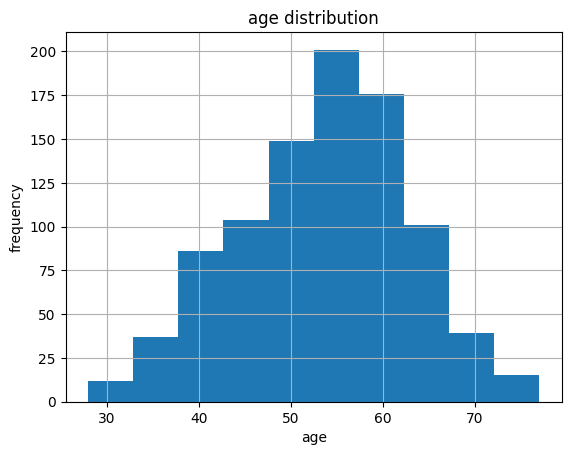

In [8]:
# start the EDA and visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
# the histogram to check the age
data['age'].hist()
plt.xlabel('age')
plt.ylabel('frequency')
plt.title('age distribution')
plt.show()


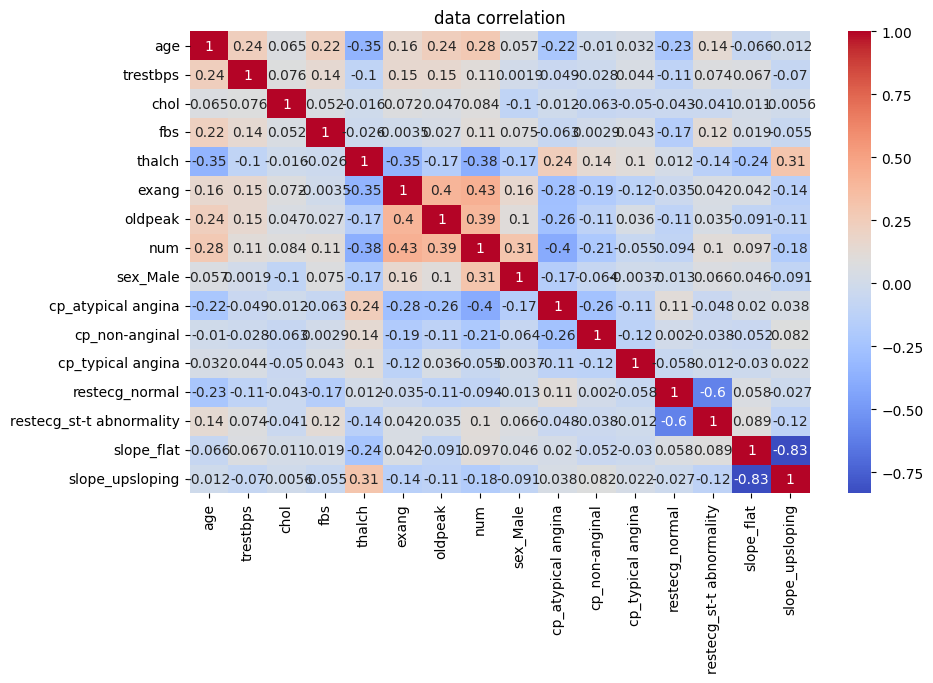

In [9]:
# the heatmap to see the correlation
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.title('data correlation')
plt.show()

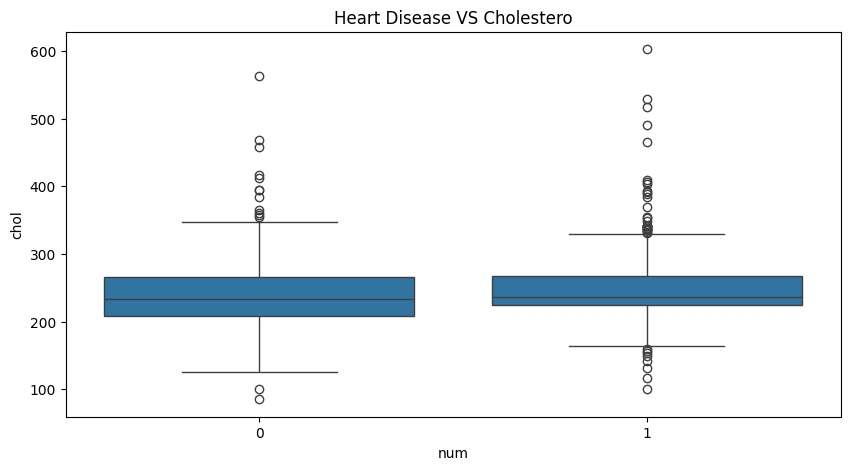

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(x='num',y='chol',data=data)
plt.title('Heart Disease VS Cholestero')
plt.show()

In [17]:
# saving 
np.save("X_scaled.npy", X_scaler)
np.save("y.npy", Y)
data.to_csv("cleaned_heart_data.csv", index=False)
np.save("X_mm.npy", X_mm)